<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-EDA" data-toc-modified-id="Загрузка-данных-и-EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и EDA</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong>LogisticRegression</strong></a></span></li><li><span><a href="#GradientBoostingClassifier" data-toc-modified-id="GradientBoostingClassifier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>GradientBoostingClassifier</strong></a></span></li><li><span><a href="#XGBClassifier" data-toc-modified-id="XGBClassifier-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong>XGBClassifier</strong></a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><strong>CatBoostClassifier</strong></a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><strong>LGBMClassifier</strong></a></span></li><li><span><a href="#Эксперименты" data-toc-modified-id="Эксперименты-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Эксперименты</a></span></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Загрузка данных и EDA

In [1]:
!pip install pysrt

In [2]:
!pip install spacy
!python -m spacy download en_core_web_sm

                                              0.0/12.8 MB ? eta -:--:--
                                              0.0/12.8 MB 1.4 MB/s eta 0:00:10
                                             0.0/12.8 MB 495.5 kB/s eta 0:00:26
                                             0.1/12.8 MB 819.2 kB/s eta 0:00:16
                                             0.1/12.8 MB 722.1 kB/s eta 0:00:18
                                             0.2/12.8 MB 704.6 kB/s eta 0:00:18
                                             0.2/12.8 MB 778.2 kB/s eta 0:00:17
                                             0.2/12.8 MB 765.3 kB/s eta 0:00:17
                                             0.2/12.8 MB 765.3 kB/s eta 0:00:17
                                             0.3/12.8 MB 655.8 kB/s eta 0:00:20
     -                                       0.4/12.8 MB 719.3 kB/s eta 0:00:18
     -                                       0.4/12.8 MB 735.7 kB/s eta 0:00:17
     -                                       0.4/

In [3]:
conda install -c anaconda py-xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install -c conda-forge catboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Olga\anaconda3

  added / updated specs:
    - catboost


The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2023.01.10-~ --> conda-forge::ca-certificates-2023.5.7-h56e8100_0 
  certifi            anaconda/win-64::certifi-2022.12.7-py~ --> conda-forge/noarch::certifi-2023.5.7-pyhd8ed1ab_0 





Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install lightgbm

In [6]:
!pip install optuna

In [ ]:
! pip install ydata-profiling

In [8]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import re
import string
import seaborn as sns
import itertools
import pickle
import pandas as pd
from numpy.random import RandomState
from scipy.stats import randint
from scipy import stats as st
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.utils.class_weight import compute_sample_weight, compute_class_weight

pd.options.mode.chained_assignment = None
pd.options.display.max_colwidth = 200
import warnings
warnings.filterwarnings("ignore")
import pysrt
import spacy
import xgboost 
import catboost 
import lightgbm
import optuna
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier
from optuna.samplers import TPESampler
from optuna.pruners import MedianPruner
from ydata_profiling import ProfileReport

In [9]:
# Установим константы
RANDOM_STATE = 42
CV = 3
VERBOSE = 100
SCORING = ['f1_weighted','balanced_accuracy', 'precision_weighted', 'recall_weighted', 'roc_auc_ovr_weighted']

In [10]:
raw_data = pd.read_excel('C:/Users/Olga/Documents/Masterskay_2/movies_labels.xlsx',index_col=0)
raw_data

,Movie,Level
id,,
0,10_Cloverfield_lane(2016),B1
1,10_things_I_hate_about_you(1999),B1
2,A_knights_tale(2001),B2
3,A_star_is_born(2018),B2
4,Aladdin(1992),A2/A2+
...,...,...
236,Matilda(2022),C1
237,Bullet train,B1
238,Thor: love and thunder,B2


In [11]:
HTML = r'<.*?>' # html тэги меняем на пробел
TAG = r'{.*?}' # тэги меняем на пробел
COMMENTS = r'[\(\[][A-Za-z ]+[\)\]]' # комменты в скобках меняем на пробел
UPPER = r'[[A-Za-z ]+[\:\]]' # указания на того кто говорит (BOBBY:)
LETTERS = r'[^a-zA-Z\'.,!? ]' # все что не буквы меняем на пробел 
SPACES = r'([ ])\1+' # повторяющиеся пробелы меняем на один пробел
DOTS = r'[\.]+' # многоточие меняем на точку
SYMB = r"[^\w\d'\s]" # знаки препинания кроме апострофа

def clean_subs(subs):
    subs = subs[1:] # удаляем первый рекламный субтитр
    txt = re.sub(HTML, ' ', subs.text) # html тэги меняем на пробел
    txt = re.sub(COMMENTS, ' ', txt) # комменты в скобках меняем на пробел
    txt = re.sub(UPPER, ' ', txt) # указания на того кто говорит (BOBBY:)
    txt = re.sub(LETTERS, ' ', txt) # все что не буквы меняем на пробел
    txt = re.sub(DOTS, r'.', txt) # многоточие меняем на точку
    txt = re.sub(SPACES, r'\1', txt) # повторяющиеся пробелы меняем на один пробел
    txt = re.sub(SYMB, '', txt) # знаки препинания кроме апострофа на пустую строку
    txt = re.sub('www', '', txt) # кое-где остаётся www, то же меняем на пустую строку
    txt = txt.lstrip() # обрезка пробелов слева
    txt = txt.encode('ascii', 'ignore').decode() # удаляем все что не ascii символы   
    txt = txt.lower() # текст в нижний регистр
    return txt

In [12]:
raw_data['Subtitles']= np.nan
raw_data

,Movie,Level,Subtitles
id,,,
0,10_Cloverfield_lane(2016),B1,NaN
1,10_things_I_hate_about_you(1999),B1,NaN
2,A_knights_tale(2001),B2,NaN
3,A_star_is_born(2018),B2,NaN
4,Aladdin(1992),A2/A2+,NaN
...,...,...,...
236,Matilda(2022),C1,NaN
237,Bullet train,B1,NaN
238,Thor: love and thunder,B2,NaN


In [13]:
movie_list=raw_data['Movie'].to_list()
movie_list

['10_Cloverfield_lane(2016)',
 '10_things_I_hate_about_you(1999)',
 'A_knights_tale(2001)',
 'A_star_is_born(2018)',
 'Aladdin(1992)',
 'All_dogs_go_to_heaven(1989)',
 'An_American_tail(1986)',
 'Babe(1995)',
 'Back_to_the_future(1985)',
 'Banking_On_Bitcoin(2016)',
 'Batman_begins(2005)',
 'Beauty_and_the_beast(2017)',
 'Before_I_go_to_sleep(2014)',
 'Before_sunrise(1995)',
 'Before_sunset(2004)',
 'Braveheart(1995)',
 'Bridget_Jones_diary(2001)',
 'Bridget_Joness_Baby',
 'Cars(2006)',
 'Cast_away(2000)',
 'Catch_me_if_you_can(2002)',
 'Charlie_and_the_Chocolate_Factory',
 'Cinderella(1950)',
 'Clueless(1995)',
 'Deadpool(2016)',
 'Despicable_Me(2010)',
 'Die_hard(1988)',
 'Dredd(2012)',
 'Dune(2021)',
 'Enola_Holmes(2020)',
 'Entrapment',
 'Eurovision_song_contest_(2020)',
 'Ferdinand(2017)',
 'Fight_club(1999)',
 'Finding_Nemo(2003)',
 'Forrest_Gump(1994)',
 'Good_Will_Hunting(1997)',
 'Groundhog_day(1993)',
 'Powder(1995)',
 'Her(2013)',
 'Home_alone(1990)',
 'Hook(1991)',
 'House_

In [14]:
list_not_iclude=[]
for i in range(len(movie_list)):
    try:
        raw_data.loc[i,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles/'+movie_list[i]+'.srt', encoding='iso-8859-1'))
    except:
        list_not_iclude.append(movie_list[i])
        continue

In [15]:
list_not_iclude

['The Secret Life of Pets.en',
 'Up (2009)',
 'The Walking Dead-S01E01-Days Gone Bye.English',
 'The Walking Dead-S01E02-Guts.English',
 'The Walking Dead-S01E03-Tell It To The Frogs.English',
 'The Walking Dead-S01E04-Vatos.English',
 'The Walking Dead-S01E05-Wildfire.English',
 'The Walking Dead-S01E06-TS-19.English',
 'AmericanBeauty1999.BRRip',
 'Angelas.Christmas.Wish.2020',
 'Indiana Jones And The Last Crusade DVDRip Xvid -IZON-',
 'mechanic-resurrection_',
 'Men.In.Black.1997.720p.Bluray.x264-SEPTiC',
 'Rat.Race.2001.1080p.WEB-DL.DD5.1.H264-FGT',
 'Seven.Worlds.One.Planet.S01E01.2160p.BluRay.Remux.eng',
 'Seven.Worlds.One.Planet.S01E02.2160p.BluRay.Remux.eng',
 'Seven.Worlds.One.Planet.S01E03.2160p.BluRay.Remux.eng',
 'Seven.Worlds.One.Planet.S01E04.2160p.BluRay.Remux.eng',
 'Seven.Worlds.One.Planet.S01E05.2160p.BluRay.Remux.eng',
 'Seven.Worlds.One.Planet.S01E06.2160p.BluRay.Remux.eng',
 'Seven.Worlds.One.Planet.S01E07.2160p.BluRay.Remux.eng',
 'Spirit.Stallion.of.the.Cimarron.

In [16]:
raw_data

,Movie,Level,Subtitles
id,,,
0,10_Cloverfield_lane(2016),B1,michelle please don't hang up just talk to me okay i can't believe you just left michelle come back please say something michelle talk to me look we had an argument couples fight that is no reason...
1,10_things_I_hate_about_you(1999),B1,i'll be right with you so cameron here you go nine schools in years my my army brat yeah my dad is that's enough i'm sure you won't find padua any different than your old schools same little ass w...
2,A_knights_tale(2001),B2,should we help him he's due in the lists in two minutes two minutes or forfeit lend us those right left dead eh three scores to none after two lances as long as sir ector doesn't fall off his hors...
3,A_star_is_born(2018),B2,get to it black eyes open wide it's time to testify there is no room for lies and everyone's waiting for you then i'm gone sitting by the phone and i'm all alone by the wayside and i'm gone sittin...
4,Aladdin(1992),A2/A2+,where the caravan camels roam where it's flat and immense and the heat is intense it's barbaric but hey it's home when the wind's from the east and the sun's from the west and the sand in the glas...
...,...,...,...
236,Matilda(2022),C1,NaN
237,Bullet train,B1,NaN
238,Thor: love and thunder,B2,NaN


In [17]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 240
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Movie      241 non-null    object
 1   Level      241 non-null    object
 2   Subtitles  110 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


In [18]:
raw_data.query('Movie =="Up(2009)"')

,Movie,Level,Subtitles
id,,,


In [19]:
raw_data.loc[106,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles/'+'Up(2009)'+'.srt', encoding='iso-8859-1'))

In [20]:
raw_data.query('Movie =="Up (2009)"')

,Movie,Level,Subtitles
id,,,
106,Up (2009),A2/A2+,i what you are now witnessing i i is footage never before seen i i by civilized humanity i i a lost world in south america i i lurking in the shadow i i of majestic paradise falls i i it sports pl...


In [21]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 240
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Movie      241 non-null    object
 1   Level      241 non-null    object
 2   Subtitles  111 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


In [22]:
for i in range(len(movie_list)):
    try:
        raw_data.loc[i,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/A2/' +movie_list[i]+ '.srt', encoding='iso-8859-1'))
    except:            
        continue

In [23]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 240
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Movie      241 non-null    object
 1   Level      241 non-null    object
 2   Subtitles  117 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


In [24]:
for i in range(len(movie_list)):
    try:
        raw_data.loc[i,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/B1/' +movie_list[i]+ '.srt', encoding='iso-8859-1'))    
    except:            
        continue

In [25]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 240
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Movie      241 non-null    object
 1   Level      241 non-null    object
 2   Subtitles  133 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


In [26]:
raw_data.query('Movie =="SlingShot (2014) WEB.eng"')

,Movie,Level,Subtitles
id,,,


In [27]:
raw_data.loc[241,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/B1/'+'SlingShot (2014) WEB.eng'+'.srt', encoding='iso-8859-1'))
raw_data.loc[241,'Movie']="SlingShot (2014) WEB.eng"
raw_data.loc[241,'Level']="B1"

In [28]:
raw_data.query('Movie =="SlingShot (2014) WEB.eng"')

,Movie,Level,Subtitles
id,,,
241,SlingShot (2014) WEB.eng,B1,we can empty half of all the beds in all the hospitals in the world by just giving people clean water so have you ever heard of dean kamen no no no uh i don't think so i have not heard of dean kam...


In [29]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 241
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Movie      242 non-null    object
 1   Level      242 non-null    object
 2   Subtitles  134 non-null    object
dtypes: object(3)
memory usage: 15.7+ KB


In [30]:
for i in range(len(movie_list)):
    try:
        raw_data.loc[i,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/C1/' +movie_list[i]+ '.srt', encoding='iso-8859-1'))
    except:            
        continue

In [31]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 241
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Movie      242 non-null    object
 1   Level      242 non-null    object
 2   Subtitles  167 non-null    object
dtypes: object(3)
memory usage: 15.7+ KB


In [32]:
for i in range(len(movie_list)):
    try:
        raw_data.loc[i,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/B2/' +movie_list[i]+ '.srt', encoding='iso-8859-1'))    
    except:            
        continue

In [33]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 241
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Movie      242 non-null    object
 1   Level      242 non-null    object
 2   Subtitles  235 non-null    object
dtypes: object(3)
memory usage: 15.7+ KB


In [34]:
raw_data.query("Subtitles != Subtitles")

,Movie,Level,Subtitles
id,,,
81,The Secret Life of Pets.en,B2,NaN
235,Glass Onion,B2,NaN
236,Matilda(2022),C1,NaN
237,Bullet train,B1,NaN
238,Thor: love and thunder,B2,NaN
239,Lightyear,B2,NaN
240,The Grinch,B1,NaN


In [35]:
raw_data[raw_data['Movie'].str.contains("Grinch")]

,Movie,Level,Subtitles
id,,,
240,The Grinch,B1,NaN


In [36]:
raw_data[raw_data['Movie'].str.contains("Sound")]

,Movie,Level,Subtitles
id,,,


In [37]:
raw_data[raw_data['Movie'].str.contains("True")]

,Movie,Level,Subtitles
id,,,


In [38]:
raw_data[raw_data['Movie'].str.contains("Frozen")]

,Movie,Level,Subtitles
id,,,


In [39]:
raw_data[raw_data['Movie'].str.contains("icarus")]

,Movie,Level,Subtitles
id,,,


In [40]:
raw_data.loc[242,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/B2/icarus.2017.web.x264-strife.srt', encoding='iso-8859-1'))
raw_data.loc[242,'Movie']="icarus.2017.web.x264-strife"
raw_data.loc[242,'Level']="B2"

In [41]:
raw_data.loc[243,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/B2/Frozen.2013.WEB-DL.DSNP.srt', encoding='iso-8859-1'))
raw_data.loc[243,'Movie']="Frozen.2013.WEB-DL.DSNP"
raw_data.loc[243,'Level']="B2"

In [42]:
raw_data.loc[244,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/B2/The.Sound.of.Music.1965.WEBRip.iTunes.srt', encoding='iso-8859-1'))
raw_data.loc[244,'Movie']="The.Sound.of.Music.1965.WEBRip.iTunes"
raw_data.loc[244,'Level']="B2"

In [43]:
raw_data.loc[245,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/B2/The.True.Cost.2015.BluRay.720p.700MB.Ganool.com.srt', encoding='iso-8859-1'))
raw_data.loc[245,'Movie']="The.True.Cost.2015.BluRay.720p.700MB.Ganool.com"
raw_data.loc[245,'Level']="B2"

In [44]:
raw_data.loc[246,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/B2/The.Grinch.2018.REMUX.1080p.Blu-ray.AVC.TrueHD.DTS-HD.MA.7.1-LEGi0N.English.srt', encoding='iso-8859-1'))
raw_data.loc[246,'Movie']="The.Grinch.2018.REMUX.1080p.Blu-ray.AVC.TrueHD.DTS-HD.MA.7.1-LEGi0N.English"
raw_data.loc[246,'Level']="B2"

In [45]:
raw_data.tail()

,Movie,Level,Subtitles
id,,,
242,icarus.2017.web.x264-strife,B2,solemnly swear the testimony you're about to give will be the truth i have never ever failed a drug test before during and after the olympics over drug tests i have never failed a test for the rec...
243,Frozen.2013.WEB-DL.DSNP,B2,more voices join in vocalization born of cold and winter air and mountain rain combining this icy force both foul and fair has a frozen heart worth mining so cut through the heart cold and clear s...
244,The.Sound.of.Music.1965.WEBRip.iTunes,B2,with the sound of music with songs they have sung for a thousand years the hills fill my heart with the sound of music my heart wants to sing every song it hears my heart wants to beat like the wi...
245,The.True.Cost.2015.BluRay.720p.700MB.Ganool.com,B2,the people who make these clothes and the impact it is having on our world it is a story about greed and fear power and poverty it is complex because it extends throughout the world but it is also...
246,The.Grinch.2018.REMUX.1080p.Blu-ray.AVC.TrueHD.DTS-HD.MA.7.1-LEGi0N.English,B2,yeah illumination whoo huh oh man aw hmm wow past the place that you come from far beyond what you've seen is a town like your town if your town was a dream only it's not a dream or a hoax or a ru...


In [46]:
add_list_1 = ['Virgin.River.S01E01.INTERNAL.720p.WEB.x264-STRiFE','Virgin.River.S01E02.INTERNAL.720p.WEB.x264-STRiFE','Virgin.River.S01E03.INTERNAL.720p.WEB.x264-STRiFE', 'Virgin.River.S01E04.INTERNAL.720p.WEB.x264-STRiFE', 'Virgin.River.S01E05.INTERNAL.720p.WEB.x264-STRiFE', 'Virgin.River.S01E06.INTERNAL.720p.WEB.x264-STRiFE', 'Virgin.River.S01E07.INTERNAL.720p.WEB.x264-STRiFE','Virgin.River.S01E08.INTERNAL.720p.WEB.x264-STRiFE','Virgin.River.S01E09.INTERNAL.720p.WEB.x264-STRiFE', 'Virgin.River.S01E10.INTERNAL.720p.WEB.x264-STRiFE']

In [47]:
for i in range(247,257):
    raw_data.loc[i,'Movie']=add_list_1[i-247]
    raw_data.loc[i,'Level']="B2"  

In [48]:
for i in range(247,257):
    try:
        raw_data.loc[i,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/B2/' +add_list_1[i-247]+ '.srt', encoding='iso-8859-1'))
    except:            
        continue

In [49]:
add_list_2 = ['Crown, The S01E01 - Wolferton Splash.en.SDH', 'Crown, The S01E02 - Hyde Park Corner.en.SDH', 'Crown, The S01E03 - Windsor.en.SDH', 'Crown, The S01E04 - Act of God.en.SDH', 'Crown, The S01E05 - Smoke and Mirrors.en.SDH', 'Crown, The S01E06 - Gelignite.en.SDH', 'Crown, The S01E07 - Scientia Potentia Est.en.SDH', 'Crown, The S01E08 - Pride & Joy.en.SDH', 'Crown, The S01E09 - Assassins.en.SDH', 'Crown, The S01E10 - Gloriana.en.SDH']

In [50]:
for i in range(258,268):
    raw_data.loc[i,'Movie']=add_list_2[i-258]
    raw_data.loc[i,'Level']="B2"  

In [51]:
for i in range(258,268):
    try:
        raw_data.loc[i,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/B2/' +add_list_2[i-258]+ '.srt', encoding='iso-8859-1'))
    except:            
        continue

In [52]:
raw_data.loc[81,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_add/The.Secret.Life.of.Pets.2016.720p.BRRip.x264.AAC-ETRG.srt', encoding='iso-8859-1'))
raw_data.loc[235,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_add/Glass.Onion.A Knives.Out.Mystery.2022.1080p.NF.WEB-DL.DDP5.1.Atmos.x264.srt', encoding='iso-8859-1'))
raw_data.loc[238,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_add/Thor.Love.and.Thunder.2022.IMAX.1080p.DSNP.WEB-DL.DDP5.1.Atmos.H.264-SMURF-HI.srt', encoding='iso-8859-1'))
raw_data.loc[240,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_add/The.Grinch.2018.1080p.WEB-DL.X264.DD5.1-SeeHD-HI.srt', encoding='iso-8859-1'))

In [53]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 267
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Movie      267 non-null    object
 1   Level      267 non-null    object
 2   Subtitles  264 non-null    object
dtypes: object(3)
memory usage: 16.4+ KB


In [54]:
raw_data.query('Subtitles==""')

,Movie,Level,Subtitles
id,,,
209,Suits S04E01 EngSub,C1,
210,Suits S04E02 EngSub,C1,
211,Suits S04E03 EngSub,C1,
212,Suits S04E04 EngSub,C1,
213,Suits S04E05 EngSub,C1,
214,Suits S04E06 EngSub,C1,
215,Suits S04E07 EngSub,C1,
216,Suits S04E08 EngSub,C1,
217,Suits S04E09 EngSub,C1,


In [55]:
list_errors = raw_data.query('Subtitles==""')['Movie'].to_list()

In [56]:
sub_1 = clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/C1/Suits S04E01 EngSub.srt'))
raw_data.loc[209,'Subtitles']=sub_1

In [57]:
sub_2 = clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/C1/Suits S04E02 EngSub.srt'))
raw_data.loc[210,'Subtitles']=sub_2

In [58]:
sub_3 = clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/C1/Suits S04E03 EngSub.srt'))
raw_data.loc[211,'Subtitles']=sub_3

In [59]:
sub_4 = clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/C1/Suits S04E04 EngSub.srt'))
raw_data.loc[212,'Subtitles']=sub_4

In [60]:
sub_5 = clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/C1/Suits S04E05 EngSub.srt'))
raw_data.loc[213,'Subtitles']=sub_5

In [61]:
sub_6 = clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/C1/Suits S04E06 EngSub.srt'))
raw_data.loc[214,'Subtitles']=sub_6

In [62]:
sub_7 = clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/C1/Suits S04E07 EngSub.srt'))
raw_data.loc[215,'Subtitles']=sub_7

In [63]:
sub_8 = clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/C1/Suits S04E08 EngSub.srt'))
raw_data.loc[216,'Subtitles']=sub_8

In [64]:
sub_9 = clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/C1/Suits S04E09 EngSub.srt'))
raw_data.loc[217,'Subtitles']=sub_9

In [65]:
sub_10 = clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/C1/Suits S04E10 EngSub.srt'))
raw_data.loc[218,'Subtitles']=sub_10

In [66]:
sub_11 = clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/C1/Suits S04E11 EngSub.srt'))
raw_data.loc[219,'Subtitles']=sub_11

In [67]:
sub_12 = clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/C1/Suits S04E12 EngSub.srt'))
raw_data.loc[220,'Subtitles']=sub_12

In [68]:
sub_13 = clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/C1/Suits S04E13 EngSub.srt'))
raw_data.loc[221,'Subtitles']=sub_13

In [69]:
sub_14 = clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/C1/Suits S04E14 EngSub.srt'))
raw_data.loc[222,'Subtitles']=sub_14

In [70]:
sub_15 = clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/C1/Suits S04E15 EngSub.srt'))
raw_data.loc[223,'Subtitles']=sub_15

In [71]:
sub_16 = clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_all/C1/Suits S04E16 EngSub.srt'))
raw_data.loc[224,'Subtitles']=sub_16

In [72]:
raw_data.query('Subtitles==""')

,Movie,Level,Subtitles
id,,,


In [73]:
raw_data.query('208<id<225')

,Movie,Level,Subtitles
id,,,
209,Suits S04E01 EngSub,C1,i have a list here of the signing bonuses of the top three associates who have come into this firm an advance plus my salary will cover my tuition those numbers don't add up summer associates work...
210,Suits S04E02 EngSub,C1,what i want is to work at pearson specter and to keep seeing you those two things are not both gonna happen you've been here for three months all you've done is hit singles and i need a goddamn ho...
211,Suits S04E03 EngSub,C1,you're good with me working on the takeover with logan as long as we don't let that affect this we won't i do always get what i want and what i want to do with this company is strip it down flip i...
212,Suits S04E04 EngSub,C1,walter i can't guarantee you we'll win but i can guarantee you that i will never sell you out well you told me that mike ross wasn't a threat and then he handcuffed us with a tro i want proof that...
213,Suits S04E05 EngSub,C1,it's sean cahill welcome to the new sec we target law firms mr forstman no you'll miss the opportunity to get back at harvey specter you've got my mil once the deal closes you cut sidwell out what...
214,Suits S04E06 EngSub,C1,that's not woodall coming after us it's sean cahill if your hands weren't full with eric they will be full with me what happened to you think i'm staying if you leave yeah that was before i knew y...
215,Suits S04E07 EngSub,C1,i want you to go back over your work with a fine tooth comb we're as protected as we can be every partner at this firm goes over their work if i say so i'm not every goddamn partner i made a deal ...
216,Suits S04E08 EngSub,C1,you really know him i really do never no why not because you can never go back forstman's insisting that i run the money through switzerland and the caymans before it comes out on the other side y...
217,Suits S04E09 EngSub,C1,i want you to decide if you love me more than you hate what i did and if you do then i want you to come home the only they'll definitely find if they get a look at those files is that you embezzle...


In [74]:
raw_data.sample(30)

,Movie,Level,Subtitles
id,,,
228,Suits.S03E04.480pHDTV.x264-mSD,C1,conspiracy to commit murder if you're looking to ride some partner's coattails you're gonna have to look somewhere else stephen huntley senior partner london office i want you to find out what the...
27,Dredd(2012),A2/A2+,within it lies a city outside the boundary walls a desert a cursed earth lnside the walls a cursed city stretching from boston to washington dc an unbroken concrete landscape million people living...
238,Thor: love and thunder,B2,oh great and mighty rapu we pray to you for water and sustenance i pray to you not for me but for my daughter i'm tired you have suffered voice come to me voice come to me you have suffered come t...
158,Suits.Episode 11- Blowback,B2,i knew it and i hired him anyway i still can't stay harvey you're making it seem like i'm the one that's taking away your dream wedding you are the one taking away my dream wedding nothing would m...
182,Suits.S01E11.1080p.BluRay.AAC5.1.x265-DTG.02.EN,B2,do i look dashing nobody says dashing james bond says dashing you think you're james bond i could be james bond i've got connery's swagger definitely daniel craig's physique lazenby's i have no id...
177,Suits.S01E06.1080p.BluRay.AAC5.1.x265-DTG.02.EN,B2,i just want the person responsible then hand me the deal we just negotiated and justice will be served you know if this were anyone else but you i wouldn't even be giving the courtesy of this meet...
199,Suits.S02E16.HDTV.x264-2HD,B2,less than out of every people who applies gets in what if i'm not one of those people i don't know maybe you'll get in somewhere else i don't want to go to law school i want to go to harvard i got...
135,Collateral.Beauty.2016.720p.BRRip.x264.AAC-ETRG,B2,thank you thank you but no give yourselves a hand because it was your hard work that gave yardsham inlet the best year in the history of this agency before we let all that success go to our heads ...
107,Venom(2018),B2,the specimens are secured and we're heading home roger lf you are a go for reentry copy that initiating reentry sequence point four by point oh shit seal it off seal it off lf mission control yo...


In [75]:
ProfileReport(raw_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [76]:
df=raw_data.copy()

In [77]:
df.head()

,Movie,Level,Subtitles
id,,,
0,10_Cloverfield_lane(2016),B1,michelle please don't hang up just talk to me okay i can't believe you just left michelle come back please say something michelle talk to me look we had an argument couples fight that is no reason...
1,10_things_I_hate_about_you(1999),B1,i'll be right with you so cameron here you go nine schools in years my my army brat yeah my dad is that's enough i'm sure you won't find padua any different than your old schools same little ass w...
2,A_knights_tale(2001),B2,should we help him he's due in the lists in two minutes two minutes or forfeit lend us those right left dead eh three scores to none after two lances as long as sir ector doesn't fall off his hors...
3,A_star_is_born(2018),B2,get to it black eyes open wide it's time to testify there is no room for lies and everyone's waiting for you then i'm gone sitting by the phone and i'm all alone by the wayside and i'm gone sittin...
4,Aladdin(1992),A2/A2+,where the caravan camels roam where it's flat and immense and the heat is intense it's barbaric but hey it's home when the wind's from the east and the sun's from the west and the sand in the glas...


In [78]:
df['Level'].value_counts()

B2            126
B1             56
C1             40
A2/A2+         26
B1, B2          8
A2              6
A2/A2+, B1      5
Name: Level, dtype: int64

In [79]:
df.query('Level == "A2/A2+, B1"') # меняем на B1

,Movie,Level,Subtitles
id,,,
35,Forrest_Gump(1994),"A2/A2+, B1",my name's forrest forrest gump do you want a chocolate i could eat about a million and a half of these my mama always said life was like a box of chocolates you never know what you're gonna get th...
39,Her(2013),"A2/A2+, B1",titlovicom to my chris i've been thinking how i could possibly tell you how much you mean to me i remember when i first started to fall in love with you like it was last night lying naked beside y...
60,Moulin_Rouge(2001),"A2/A2+, B1",there was a boy a very strange enchanted boy they say he wandered very far very far over land and sea don't be fooled evil a little shy turn away from this village of sin and sad of eye but very w...
87,The_fault_in_our_stars(2014),"A2/A2+, B1",on the one hand you can sugarcoat it the way they do in movies and romance novels where beautiful people learn beautiful lessons where nothing is too messed up that can't be fixed with an apology ...
99,The_terminal(2004),"A2/A2+, B1",pa jingles on pa united airlines announcing the arrival of flight from beijing customer service representative report to gate c on pa all visitors to the us should line up at booths one through ...


In [80]:
list_b1= df.query('Level == "A2/A2+, B1"').index.to_list()
for i in list_b1:
    df.loc[i,'Level']='B1'

In [81]:
df.query('Level == "A2/A2+, B1"')

,Movie,Level,Subtitles
id,,,


In [82]:
df.query('Level == "B1, B2"') # меняем на B2

,Movie,Level,Subtitles
id,,,
13,Before_sunrise(1995),"B1, B2",do you have any idea what they were arguing about do you speak english yeah no i'm sorry my german is not very good have you heard that as couples age they lose their ability to hear each other no...
14,Before_sunset(2004),"B1, B2",well i mean isn't everything autobiographical i mean we all see the world through our own tiny keyhole right i mean i always think of thomas wolfe have you ever seen that little one page note to r...
16,Bridget_Jones_diary(2001),"B1, B2",in my thirty second year of being single once again i found myself on my own and going to my mother's annual turkey curry buffet every year she tries to fix me up with some bushy haired middle age...
20,Catch_me_if_you_can(2002),"B1, B2",our first guest he's made a career out of being the most outrageous impostor that we've ever come across on this show you'll see what i mean number one what is your name please my name is frank wi...
50,Lion(2016),"B1, B2",saroo come on come on get up come on quickly hold it properly saroo catch get down guddu the guards hey boy get down go get down boy saroo i'm here we will get a lot of money today we've got a lot...
82,The_Shawshank_redemption(1994),"B1, B2",if i didn't care more than words can say if i didn't care would i feel this way if this isn't love then why do i thrill and what makes my head go round and round while my heart stands still if i d...
88,The_graduate(1967),"B1, B2",the sound you just heard is the landing gear locking into place los angeles weather is clear temperature is we expect to make our hour and minute flight on schedule we have enjoyed having you onb...
95,The_lord_of_the_rings(2001),"B1, B2",the world is changed i feel it in the water i feel it in the earth i smell it in the air much that once was is lost for none now live who remember it it began with the forging of the great rings i...


In [83]:
list_b2= df.query('Level == "B1, B2"').index.to_list()
for i in list_b2:
    df.loc[i,'Level']='B1'

In [84]:
df.query('Level == "B1, B2"') 

,Movie,Level,Subtitles
id,,,


In [85]:
df.query('Level == "A2/A2+"') # меняем на A2

,Movie,Level,Subtitles
id,,,
4,Aladdin(1992),A2/A2+,where the caravan camels roam where it's flat and immense and the heat is intense it's barbaric but hey it's home when the wind's from the east and the sun's from the west and the sand in the glas...
5,All_dogs_go_to_heaven(1989),A2/A2+,itchy a few more degrees to the left now tap no no your other left that's it keep coming keep coming you're almost through yow itchy what is it idgiidgiho are you ok idgihow well don't stop now hi...
6,An_American_tail(1986),A2/A2+,tanya fievel will you stop that twirling twirling uh no no more that's it time for bed come but mama it's hanukkah for you every night is hanukkah papa enough already they'll never get to sleep al...
7,Babe(1995),A2/A2+,and how it changed our valley forever there was a time not so long ago when pigs were afforded no respect except by other pigs they lived their whole lives in a cruel and sunless world in those da...
8,Back_to_the_future(1985),A2/A2+,so right now statler toyota is making the best deals of the year on all model toyotas you won't find a better car at a better price with better service anywhere in hill valley that's statler toyot...
10,Batman_begins(2005),A2/A2+,can i see finders keepers and i found it in my garden finders keepers bruce bruce mom mr alfred did you have dream nightmare worse than this place they are going to fight you again until they kill...
19,Cast_away(2000),A2/A2+,mrs peterson ramon hey how's it goin' how you doin' there it is right there on the desk where's she headed she's snowbound ramon see you went with the pink yeah yeah it's kind of a pink day today ...
27,Dredd(2012),A2/A2+,within it lies a city outside the boundary walls a desert a cursed earth lnside the walls a cursed city stretching from boston to washington dc an unbroken concrete landscape million people living...
31,Eurovision_song_contest_(2020),A2/A2+,you'll see why in a minute the song is called oh and it's napoleon napoleon no wonder their song is called man erick is your son ok he misses his mother announcer waterloo by abba for sweden watch...


In [86]:
list_a2= df.query('Level == "A2/A2+"').index.to_list()
for i in list_a2:
    df.loc[i,'Level']='B1'

In [87]:
df.query('Level == "A2/A2+"')

,Movie,Level,Subtitles
id,,,


In [88]:
df['Level'].value_counts()

B2    126
B1     95
C1     40
A2      6
Name: Level, dtype: int64

In [89]:
df['Level'].unique()

array(['B1', 'B2', 'C1', 'A2'], dtype=object)

In [90]:
df = df.dropna ()

In [91]:
df = df.reset_index(drop=True)

In [92]:
# Load the English library from SpaCy
nlp = spacy.load("en_core_web_sm")

# Create list of punctuation marks
punctuations = string.punctuation

# Create list of stopwords from spaCy
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [93]:
# Creat tokenizer function
def spacy_tokenizer(sentence):
    # Create token object from spacy
    tokens = nlp(sentence)

    # Correct spelling
    # tokens = tokens._.outcome_spellCheck
    # tokens = nlp(tokens)

    # Lemmatize each token and convert each token into lowercase
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "PROPN" else word.lower_ for word in tokens]
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords and word not in punctuations]
    
    # Remove links
    #tokens = [remove_urls(word) for word in tokens]
    
    # return preprocessed list of tokens
    return tokens

In [94]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [95]:
X = df['Subtitles'] # the features we want to analyze
ylabels = df['Level'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size = 0.10,stratify=ylabels, random_state = RANDOM_STATE)
print(f'X_train dimension: {X_train.shape}')
print(f'y_train dimension: {y_train.shape}')
print(f'X_test dimension: {X_test.shape}')
print(f'y_test dimension: {y_test.shape}')

X_train dimension: (237,)
y_train dimension: (237,)
X_test dimension: (27,)
y_test dimension: (27,)


Таким образом, собран датасет на основании предоставленных данных о фильмах и уровне сложности языка. Чтение субтитров произведено с использованием библиотеки pysrt. Обработка и токенизирование текста будет произведено с использованием библиотеки SpaCy, для векторизации применен TfidfVectorizer в составе pipeline c использованием различных моделей машинного обучения. 

## **LogisticRegression**

In [101]:
model_lr = LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced')
pipeline_model_lr = Pipeline([('vectorizer', tfidf_vector),
                              ('classifier', model_lr )])
parameters = [{ 
              'classifier__solver': ['lbfgs'],
              'classifier__max_iter': range (100,301,100),
              'classifier__penalty': ['l2', None] 
             }]
grid_search_lr = GridSearchCV(
              pipeline_model_lr,
              parameters,
              cv = CV, 
              verbose = VERBOSE,
              scoring = SCORING ,
              refit='f1_weighted',              
              return_train_score=True
              )
grid_search_lr.fit(X_train,y_train)
metrics_columns_lr = [f'mean_test_{x}' for x in SCORING]
final_metrics_lr = pd.DataFrame(grid_search_lr.cv_results_)[metrics_columns_lr].iloc[grid_search_lr.best_index_]

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3; 1/6] START classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs
[CV 1/3; 1/6] END classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs; balanced_accuracy: (train=0.959, test=0.801) f1_weighted: (train=0.924, test=0.721) precision_weighted: (train=0.937, test=0.736) recall_weighted: (train=0.924, test=0.722) roc_auc_ovr_weighted: (train=0.996, test=0.869) total time= 5.3min
[CV 2/3; 1/6] START classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs
[CV 2/3; 1/6] END classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs; balanced_accuracy: (train=0.973, test=0.675) f1_weighted: (train=0.949, test=0.707) precision_weighted: (train=0.955, test=0.786) recall_weighted: (train=0.949, test=0.709) roc_auc_ovr_weighted: (train=0.998, test=0.828) total time= 5.6min
[CV 3/3; 1/6] START classifier__max_iter=100, classifier__penalty=l2, classifier__

In [102]:
# среднее значение f1 на кросс-валидации 
print(f'Значение f1: {grid_search_lr.best_score_}')
print(f'Значение f1:', grid_search_lr.cv_results_['mean_test_f1_weighted'][grid_search_lr.best_index_])
# среднее значение accuracy на кросс-валидации 
print(f'Значение accuracy:', grid_search_lr.cv_results_['mean_test_balanced_accuracy'][grid_search_lr.best_index_])
# среднее значение precision на кросс-валидации 
print(f'Значение precision:', grid_search_lr.cv_results_['mean_test_precision_weighted'][grid_search_lr.best_index_])
# среднее значение recall на кросс-валидации 
print(f'Значение recall:', grid_search_lr.cv_results_['mean_test_recall_weighted'][grid_search_lr.best_index_])
# среднее значение auc-roc на кросс-валидации 
print(f'Значение auc-roc:', grid_search_lr.cv_results_['mean_test_roc_auc_ovr_weighted'][grid_search_lr.best_index_])
# лучшие гиперпараметры модели на кросс-валидации 
print(f'Лучшие параметры: {grid_search_lr.best_params_}')
# лучшие гиперпараметры лучшей модели 
print(f'Параметры модели: {grid_search_lr.best_estimator_}')

Значение f1: 0.7452059957383196
Значение f1: 0.7452059957383196
Значение accuracy: 0.7819864376125718
Значение precision: 0.794607985854511
Значение recall: 0.7468354430379747
Значение auc-roc: 0.8503598078388149
Лучшие параметры: {'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Параметры модели: Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x000001C7555DB520>)),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=42))])


In [110]:
# сохранение модели
best_model_lr = grid_search_lr.best_estimator_
with open('C:/Users/Olga/Documents/Masterskay_2/best_model_lr.pkl', "wb") as dataset:
    pickle.dump(best_model_lr, dataset)

## **GradientBoostingClassifier**

Так как GradientBoostingClassifier не поддерживает параметр class_weight='balanced', для учета баланса классов вычислим баланс классов и установим соответствующие веса при обучении через параметр sample_weight

In [156]:
class_weights = compute_class_weight(  "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                    
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{'A2': 11.85,
 'B1': 0.6970588235294117,
 'B2': 0.5290178571428571,
 'C1': 1.6928571428571428}

In [158]:
sample_weights=compute_sample_weight(class_weight='balanced', y=y_train)

In [160]:
classifier_gb = GradientBoostingClassifier(random_state=RANDOM_STATE)

# Create pipeline usining TfidfVectorizer
pipe_gb = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier_gb)])

# model generation
pipe_gb.fit(X_train,y_train, classifier__sample_weight = sample_weights)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x000002E7A7CCF1C0>)),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [162]:
classifier_gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# %%time
# ## функция для поиска optuna
# def objective(trial):
#     n_estimators = trial.suggest_int("n_estimators", 50, 600)
#     criterion = trial.suggest_categorical("criterion", ['friedman_mse', 'squared_error'])
#     loss = trial.suggest_categorical("loss", ['log_loss'])
#     max_depth = trial.suggest_int("max_depth", 3, 12)
#     min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 6)
#     min_samples_split = trial.suggest_int("min_samples_split", 2, 6)
#     max_features = trial.suggest_int("max_features", 4,6)
#     learning_rate = trial.suggest_float("learning_rate", 0.01, 0.2)
#     subsample = trial.suggest_float("subsample", 0.66, 1)
    
#     model = GradientBoostingClassifier(
#         random_state=RANDOM_STATE,
#         n_estimators=n_estimators,
#         criterion=criterion,
#         loss=loss,
#         max_depth=max_depth,
#         min_samples_leaf=min_samples_leaf,
#         min_samples_split=min_samples_split,
#         max_features=max_features,
#         learning_rate=learning_rate,
#         subsample=subsample
#     )
    
#     pipe_gb_optuna = Pipeline([('vectorizer', tfidf_vector),
#                                ('classifier', model)])

    
#     score = cross_val_score(pipe_gb_optuna, X_train, y_train, cv=CV, scoring='f1_weighted')
#     f1_weighted= score.mean()
#     return f1_weighted

# study = optuna.create_study(
#     direction='maximize',
#     sampler=optuna.samplers.RandomSampler(),
#     study_name='english',
#     storage="sqlite:///english.db"
# )

# study.optimize(objective, n_trials=5)
# study.best_params
# study.best_value
# study.best_trial

# # loaded_study = optuna.load_study(study_name="Shipkova", storage="sqlite:///cardio.db")
# # assert len(loaded_study.trials) == len(study.trials)

# #Сохранение только истории поиска в виде датафрейма
# # df = study.trials_dataframe()
# # df.to_csv('study.csv')
# # loaded = pd.read_csv('study.csv')
# #Сохранение дампа самого оптимизатора
# #joblib.dump(study, 'experiments.pkl')
# #study_loaded = joblib.load('experiments.pkl')
# #study_loaded.trials_dataframe()

In [ ]:
# %%time
# # random search cv
# rs_space={'classifier__max_depth':list(np.arange(3, 12, step=1)),
#           'classifier__n_estimators':np.arange(100, 600, step=50),
#           'classifier__max_features':randint(4,7),
#           'classifier__subsample' : [1],
#           'classifier__loss': ['log_loss'],
#           'classifier__learning_rate': np.arange(0.01, 0.2, step=0.01),
#           'classifier__min_samples_leaf': randint(2,7),
#           'classifier__min_samples_split':np.arange(2, 7, step=1)
#           }

# gb = GradientBoostingClassifier(random_state=RANDOM_STATE)
# pipeline_model_RV_gb = Pipeline([('vectorizer', tfidf_vector),
#                                  ('classifier', gb )])

# gb_random = RandomizedSearchCV(pipeline_model_RV_gb, rs_space, n_iter=2, scoring='f1_weighted', cv=CV, verbose=VERBOSE)
# model_random_gb = gb_random.fit(X_train, y_train, classifier__sample_weight = sample_weights)

# # random random search результаты
# print('Лучшие параметры модели: '+str(model_random_gb.best_params_))
# print('Лучший random search score : '+str(model_random_gb.best_score_))

In [128]:
%%time
model_gb = GradientBoostingClassifier(random_state=RANDOM_STATE)

pipeline_model_gb = Pipeline([('vectorizer', tfidf_vector),
                              ('classifier', model_gb )])
parameters = [{ 
              'classifier__max_depth': [3],
              'classifier__learning_rate': [0.2, 0.3],
              'classifier__subsample' : [1],
              'classifier__n_estimators' : [200, 300],
              'classifier__loss': ['log_loss'],
              'classifier__max_features':[None] 
}]

grid_search_gb = GridSearchCV(
    pipeline_model_gb,
    parameters,
    cv = CV, 
    verbose = VERBOSE,
    scoring = SCORING,         
    refit='f1_weighted',  
    return_train_score=True  
)

grid_search_gb.fit(X_train, y_train, classifier__sample_weight = sample_weights)

metrics_columns_gb = [f'mean_test_{x}' for x in SCORING]
final_metrics_gb = pd.DataFrame(grid_search_gb.cv_results_)[metrics_columns_gb].iloc[grid_search_gb.best_index_]

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START classifier__learning_rate=0.2, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=None, classifier__n_estimators=200, classifier__subsample=1
[CV 1/3; 1/4] END classifier__learning_rate=0.2, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=None, classifier__n_estimators=200, classifier__subsample=1; balanced_accuracy: (train=0.997, test=0.841) f1_weighted: (train=0.994, test=0.785) precision_weighted: (train=0.994, test=0.787) recall_weighted: (train=0.994, test=0.785) roc_auc_ovr_weighted: (train=1.000, test=0.896) total time= 6.1min
[CV 2/3; 1/4] START classifier__learning_rate=0.2, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=None, classifier__n_estimators=200, classifier__subsample=1
[CV 2/3; 1/4] END classifier__learning_rate=0.2, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=None, class

In [129]:
# среднее значение f1 на кросс-валидации 
print(f'Значение f1: {grid_search_gb.best_score_}')
print(f'Значение f1:', grid_search_gb.cv_results_['mean_test_f1_weighted'][grid_search_gb.best_index_])
# среднее значение accuracy на кросс-валидации 
print(f'Значение accuracy:', grid_search_gb.cv_results_['mean_test_balanced_accuracy'][grid_search_gb.best_index_])
# среднее значение precision на кросс-валидации 
print(f'Значение precision:', grid_search_gb.cv_results_['mean_test_precision_weighted'][grid_search_gb.best_index_])
# среднее значение recall на кросс-валидации 
print(f'Значение recall:', grid_search_gb.cv_results_['mean_test_recall_weighted'][grid_search_gb.best_index_])
# среднее значение auc-roc на кросс-валидации 
print(f'Значение auc-roc:', grid_search_gb.cv_results_['mean_test_roc_auc_ovr_weighted'][grid_search_gb.best_index_])
# лучшие гиперпараметры модели на кросс-валидации 
print(f'Лучшие параметры: {grid_search_gb.best_params_}')
# лучшие гиперпараметры лучшей модели 
print(f'Параметры модели: {grid_search_gb.best_estimator_}')

Значение f1: 0.7159392626113291
Значение f1: 0.7159392626113291
Значение accuracy: 0.7767319299760316
Значение precision: 0.7224193533702641
Значение recall: 0.7172995780590717
Значение auc-roc: 0.8334317300684672
Лучшие параметры: {'classifier__learning_rate': 0.2, 'classifier__loss': 'log_loss', 'classifier__max_depth': 3, 'classifier__max_features': None, 'classifier__n_estimators': 200, 'classifier__subsample': 1}
Параметры модели: Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x000001E76DED6DD0>)),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.2, n_estimators=200,
                                            random_state=42, subsample=1))])


In [148]:
# сохранение модели
best_model_gb = grid_search_gb.best_estimator_
with open('C:/Users/Olga/Documents/Masterskay_2/best_model_gb.pkl', "wb") as dataset:
    pickle.dump(best_model_gb, dataset)

## **XGBClassifier**

In [149]:
le_xgb = LabelEncoder()
y_train_xgb = le_xgb.fit_transform(y_train_xgb)

In [131]:
sample_weights_xgb=compute_sample_weight(class_weight='balanced', y=y_train_xgb)

In [164]:
classifier_xgb = XGBClassifier(random_state=RANDOM_STATE, objective='multi:softmax', eval_metric=['auc'], num_class=4)

# Create pipeline usining TfidfVectorizer
pipe_xgb = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier_xgb)])

# model generation
pipe_xgb.fit(X_train,y_train_xgb, classifier__sample_weight = sample_weights_xgb)

C:\Users\Olga\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x00000205FF22A8C0>)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=['auc'],
                               feature_types=None, gamma=None, gpu_i...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_class=4, num_parallel_tree=None,
                               objective='multi:softmax', ...))])

## **CatBoostClassifier**

In [99]:
le_cat = LabelEncoder()
y_train_cat = le_cat.fit_transform(y_train)

In [100]:
np.unique(y_train_cat)

array([0, 1, 2, 3])

In [101]:
class_weights_cat

{0: 11.85, 1: 0.6970588235294117, 2: 0.5290178571428571, 3: 1.6928571428571428}

In [102]:
model_catboost = CatBoostClassifier(loss_function='MultiClass', eval_metric='TotalF1:average=Weighted', random_state=RANDOM_STATE, classes_count=4, class_weights = class_weights_cat, task_type='CPU', bootstrap_type='Bayesian')

pipeline_model_catboost = Pipeline([('vectorizer', tfidf_vector),
                              ('classifier', model_catboost)])

parameters = [{ 
              'classifier__depth': [3, 6],                                           
              'classifier__bagging_temperature': [1, 3]                      
              }]

grid_search_catboost = GridSearchCV(
    pipeline_model_catboost,
    parameters,
    cv = CV, 
    verbose = VERBOSE,
    scoring = SCORING,         
    refit='f1_weighted',  
    return_train_score=True  
)    

grid_search_catboost.fit(X_train, y_train_cat, classifier__sample_weight = sample_weights_cat)


metrics_columns_catboost = [f'mean_test_{x}' for x in SCORING]
final_metrics_catboost = pd.DataFrame(grid_search_catboost.cv_results_)[metrics_columns_catboost].iloc[grid_search_catboost.best_index_]

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START classifier__bagging_temperature=1, classifier__depth=3......
Learning rate set to 0.07202
0:	learn: 0.8048176	total: 255ms	remaining: 4m 14s
1:	learn: 0.7541485	total: 314ms	remaining: 2m 36s
2:	learn: 0.7541485	total: 373ms	remaining: 2m 3s
3:	learn: 0.7541485	total: 430ms	remaining: 1m 47s
4:	learn: 0.7541485	total: 493ms	remaining: 1m 38s
5:	learn: 0.7541485	total: 554ms	remaining: 1m 31s
6:	learn: 0.7541485	total: 611ms	remaining: 1m 26s
7:	learn: 0.7541485	total: 667ms	remaining: 1m 22s
8:	learn: 0.7541485	total: 730ms	remaining: 1m 20s
9:	learn: 0.7541485	total: 791ms	remaining: 1m 18s
10:	learn: 0.7541485	total: 848ms	remaining: 1m 16s
11:	learn: 0.7541485	total: 904ms	remaining: 1m 14s
12:	learn: 0.7541485	total: 966ms	remaining: 1m 13s
13:	learn: 0.7541485	total: 1.03s	remaining: 1m 12s
14:	learn: 0.7541485	total: 1.1s	remaining: 1m 12s
15:	learn: 0.7541485	total: 1.15s	remaining: 1m 10s
16:	learn:

In [103]:
# среднее значение f1 на кросс-валидации 
print(f'Значение f1: {grid_search_catboost.best_score_}')
print(f'Значение f1:', grid_search_catboost.cv_results_['mean_test_f1_weighted'][grid_search_catboost.best_index_])
# среднее значение accuracy на кросс-валидации 
print(f'Значение accuracy:', grid_search_catboost.cv_results_['mean_test_balanced_accuracy'][grid_search_catboost.best_index_])
# среднее значение precision на кросс-валидации 
print(f'Значение precision:', grid_search_catboost.cv_results_['mean_test_precision_weighted'][grid_search_catboost.best_index_])
# среднее значение recall на кросс-валидации 
print(f'Значение recall:', grid_search_catboost.cv_results_['mean_test_recall_weighted'][grid_search_catboost.best_index_])
# среднее значение auc-roc на кросс-валидации 
print(f'Значение auc-roc:', grid_search_catboost.cv_results_['mean_test_roc_auc_ovr_weighted'][grid_search_catboost.best_index_])
# лучшие гиперпараметры модели на кросс-валидации 
print(f'Лучшие параметры: {grid_search_catboost.best_params_}')
# лучшие гиперпараметры лучшей модели 
print(f'Параметры модели: {grid_search_catboost.best_estimator_}')

Значение f1: 0.7100973346237992
Значение f1: 0.7100973346237992
Значение accuracy: 0.7303057279236952
Значение precision: 0.7186238798301345
Значение recall: 0.7130801687763713
Значение auc-roc: 0.8290713346405564
Лучшие параметры: {'classifier__bagging_temperature': 3, 'classifier__depth': 3}
Параметры модели: Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x000002E7A7CCF1C0>)),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x000002E7AFE370D0>)])


Значение f1: 0.7100973346237992
Значение f1: 0.7100973346237992
Значение accuracy: 0.7303057279236952
Значение precision: 0.7186238798301345
Значение recall: 0.7130801687763713
Значение auc-roc: 0.8290713346405564
Лучшие параметры: {'classifier__bagging_temperature': 3, 'classifier__depth': 3}
Параметры модели: Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x000002E7A7CCF1C0>)),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x000002E7AFE370D0>)])

In [120]:
grid_search_catboost.get_params()

{'cv': 3,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('vectorizer',
   TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x000002E7A7CCF1C0>)),
  ('classifier', <catboost.core.CatBoostClassifier at 0x2e7afaeb5e0>)],
 'estimator__verbose': False,
 'estimator__vectorizer': TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x000002E7A7CCF1C0>),
 'estimator__classifier': <catboost.core.CatBoostClassifier at 0x2e7afaeb5e0>,
 'estimator__vectorizer__analyzer': 'word',
 'estimator__vectorizer__binary': False,
 'estimator__vectorizer__decode_error': 'strict',
 'estimator__vectorizer__dtype': numpy.float64,
 'estimator__vectorizer__encoding': 'utf-8',
 'estimator__vectorizer__input': 'content',
 'estimator__vectorizer__lowercase': True,
 'estimator__vectorizer__max_df': 1.0,
 'estimator__vectorizer__max_features': None,
 'estimator__vectorizer__min_df': 1,
 'estimator__vectorizer__ngram_range': (1, 1),
 'estimator__vectorizer__norm': 'l2',
 'estimator__vect

In [131]:
# сохранение модели
best_model_catboost = grid_search_catboost.best_estimator_
with open('C:/Users/Olga/Documents/Masterskay_2/best_model_catboost.pkl', "wb") as dataset:
    pickle.dump(best_model_catboost, dataset)

## **LGBMClassifier**

In [132]:
class_weights_lgbm = compute_class_weight("balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                  
                                         )
class_weights_lgbm = dict(zip(np.unique(y_train), class_weights_lgbm))
class_weights_lgbm

{'A2': 11.85,
 'B1': 0.6970588235294117,
 'B2': 0.5290178571428571,
 'C1': 1.6928571428571428}

In [133]:
sample_weights_lgbm=compute_sample_weight(class_weight='balanced', y=y_train)

In [144]:
%%time
model_lgbm = LGBMClassifier(random_state=RANDOM_STATE, metric='multi_logloss', objective='multiclass', num_class=4, class_weight=class_weights_lgbm)

pipeline_model_lgbm = Pipeline([('vectorizer', tfidf_vector),
                              ('classifier', model_lgbm )])
parameters = [{ 
              'classifier__max_depth': [-1, 3],
              'classifier__learning_rate': [0.1, 0.3],
              'classifier__subsample' : [1],
              'classifier__n_estimators' : [100]            
}]

grid_search_lgbm = GridSearchCV(
    pipeline_model_lgbm,
    parameters,
    cv = CV, 
    verbose = VERBOSE,
    scoring = SCORING,         
    refit='f1_weighted',  
    return_train_score=True  
)

grid_search_lgbm.fit(X_train, y_train, classifier__sample_weight = sample_weights_lgbm)

metrics_columns_lgbm = [f'mean_test_{x}' for x in SCORING]
final_metrics_lgbm = pd.DataFrame(grid_search_lgbm.cv_results_)[metrics_columns_lgbm].iloc[grid_search_lgbm.best_index_]

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START classifier__learning_rate=0.1, classifier__max_depth=-1, classifier__n_estimators=100, classifier__subsample=1
[CV 1/3; 1/4] END classifier__learning_rate=0.1, classifier__max_depth=-1, classifier__n_estimators=100, classifier__subsample=1; balanced_accuracy: (train=0.997, test=0.430) f1_weighted: (train=0.994, test=0.608) precision_weighted: (train=0.994, test=0.621) recall_weighted: (train=0.994, test=0.633) roc_auc_ovr_weighted: (train=1.000, test=0.776) total time= 5.3min
[CV 2/3; 1/4] START classifier__learning_rate=0.1, classifier__max_depth=-1, classifier__n_estimators=100, classifier__subsample=1
[CV 2/3; 1/4] END classifier__learning_rate=0.1, classifier__max_depth=-1, classifier__n_estimators=100, classifier__subsample=1; balanced_accuracy: (train=1.000, test=0.682) f1_weighted: (train=1.000, test=0.595) precision_weighted: (train=1.000, test=0.601) recall_weighted: (train=1.000, test=0.595) roc_a

In [149]:
# среднее значение f1 на кросс-валидации 
print(f'Значение f1: {grid_search_lgbm.best_score_}')
print(f'Значение f1:', grid_search_lgbm.cv_results_['mean_test_f1_weighted'][grid_search_lgbm.best_index_])
# среднее значение accuracy на кросс-валидации 
print(f'Значение accuracy:', grid_search_lgbm.cv_results_['mean_test_balanced_accuracy'][grid_search_lgbm.best_index_])
# среднее значение precision на кросс-валидации 
print(f'Значение precision:', grid_search_lgbm.cv_results_['mean_test_precision_weighted'][grid_search_lgbm.best_index_])
# среднее значение recall на кросс-валидации 
print(f'Значение recall:', grid_search_lgbm.cv_results_['mean_test_recall_weighted'][grid_search_lgbm.best_index_])
# среднее значение auc-roc на кросс-валидации 
print(f'Значение auc-roc:', grid_search_lgbm.cv_results_['mean_test_roc_auc_ovr_weighted'][grid_search_lgbm.best_index_])
# лучшие гиперпараметры модели на кросс-валидации 
print(f'Лучшие параметры: {grid_search_lgbm.best_params_}')
# лучшие гиперпараметры лучшей модели 
print(f'Параметры модели: {grid_search_lgbm.best_estimator_}')

Значение f1: 0.6684705552286685
Значение f1: 0.6684705552286685
Значение accuracy: 0.605090957858653
Значение precision: 0.6742080194611839
Значение recall: 0.6751054852320676
Значение auc-roc: 0.7733278628335825
Лучшие параметры: {'classifier__learning_rate': 0.3, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 1}
Параметры модели: Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x000002E7A7CCF1C0>)),
                ('classifier',
                 LGBMClassifier(class_weight={'A2': 11.85,
                                              'B1': 0.6970588235294117,
                                              'B2': 0.5290178571428571,
                                              'C1': 1.6928571428571428},
                                learning_rate=0.3, max_depth=3,
                                metric='multi_logloss', num_class=4,
                                objective='multiclass', rando

In [106]:
# сохранение модели
best_model_lr = grid_search_lr.best_estimator_
with open('C:/Users/Olga/Documents/Masterskay_2/model.pkl', "wb") as dataset:
    pickle.dump(best_model_lr, dataset)

Таким образом, наилучший результат показала модель LogicsticRegression, второй результат у модели GradientBoostingClassifier. 
Наихудшие результаты показали модели LGBMClassifier и XGBClassifier. Из-за ее очень долгой работы, результаты подбора параметров изъяты из итогового кода. В целом модели обучаются достаточно долго, что затрудняет подбор гиперпараметров, в т.ч. с использованием Optuna и RandomizedSearchCV.

## Эксперименты

Проведем эксперименты с двумя моделями, показавшими лучший результат на стадии тестирования моделей: LogicsticRegression и GradientBoostingClassifier. 

Используем в обучении моделей иниграмы и биграмы.

In [99]:
model_lr_1 = LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced')
pipeline_model_lr_1 = Pipeline([('vectorizer', tfidf_vector),
                              ('classifier', model_lr_1 )])
parameters = [{
              'vectorizer__ngram_range': [(1, 1), (1, 2)],
              'classifier__solver': ['lbfgs'],
              'classifier__max_iter': [100],
              'classifier__penalty': ['l2'] 
             }]
grid_search_lr_1 = GridSearchCV(
              pipeline_model_lr_1,
              parameters,
              cv = CV, 
              verbose = VERBOSE,
              scoring = SCORING ,
              refit='f1_weighted',              
              return_train_score=True
              )
grid_search_lr_1.fit(X_train,y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3; 1/2] START classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs, vectorizer__ngram_range=(1, 1)
[CV 1/3; 1/2] END classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs, vectorizer__ngram_range=(1, 1); balanced_accuracy: (train=0.959, test=0.801) f1_weighted: (train=0.924, test=0.721) precision_weighted: (train=0.937, test=0.736) recall_weighted: (train=0.924, test=0.722) roc_auc_ovr_weighted: (train=0.996, test=0.869) total time= 5.1min
[CV 2/3; 1/2] START classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs, vectorizer__ngram_range=(1, 1)
[CV 2/3; 1/2] END classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs, vectorizer__ngram_range=(1, 1); balanced_accuracy: (train=0.973, test=0.675) f1_weighted: (train=0.949, test=0.707) precision_weighted: (train=0.955, test=0.786) recall_weighted: (train=0.949, test=0.709) roc_auc_ovr_weighted: 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x00000256422DADD0>)),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42))]),
             param_grid=[{'classifier__max_iter': [100],
                          'classifier__penalty': ['l2'],
                          'classifier__solver': ['lbfgs'],
                          'vectorizer__ngram_range': [(1, 1), (1, 2)]}],
             refit='f1_weighted', return_train_score=True,
             scoring=['f1_weighted', 'balanced_accuracy', 'precision_weighted',
                      'recall_weighted', 'roc_auc_ovr_weighted'],
             verbose=100)

In [100]:
# среднее значение f1 на кросс-валидации 
print(f'Значение f1: {grid_search_lr_1.best_score_}')
print(f'Значение f1:', grid_search_lr_1.cv_results_['mean_test_f1_weighted'][grid_search_lr_1.best_index_])
# среднее значение accuracy на кросс-валидации 
print(f'Значение accuracy:', grid_search_lr_1.cv_results_['mean_test_balanced_accuracy'][grid_search_lr_1.best_index_])
# среднее значение precision на кросс-валидации 
print(f'Значение precision:', grid_search_lr_1.cv_results_['mean_test_precision_weighted'][grid_search_lr_1.best_index_])
# среднее значение recall на кросс-валидации 
print(f'Значение recall:', grid_search_lr_1.cv_results_['mean_test_recall_weighted'][grid_search_lr_1.best_index_])
# среднее значение auc-roc на кросс-валидации 
print(f'Значение auc-roc:', grid_search_lr_1.cv_results_['mean_test_roc_auc_ovr_weighted'][grid_search_lr_1.best_index_])
# лучшие гиперпараметры модели на кросс-валидации 
print(f'Лучшие параметры: {grid_search_lr_1.best_params_}')
# лучшие гиперпараметры лучшей модели 
print(f'Параметры модели: {grid_search_lr_1.best_estimator_}')

Значение f1: 0.7452059957383196
Значение f1: 0.7452059957383196
Значение accuracy: 0.7819864376125718
Значение precision: 0.794607985854511
Значение recall: 0.7468354430379747
Значение auc-roc: 0.8503598078388149
Лучшие параметры: {'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs', 'vectorizer__ngram_range': (1, 1)}
Параметры модели: Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x00000256422DADD0>)),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=42))])


In [104]:
class_weights = compute_class_weight(  "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                    
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{'A2': 11.85,
 'B1': 0.6970588235294117,
 'B2': 0.5290178571428571,
 'C1': 1.6928571428571428}

In [105]:
sample_weights=compute_sample_weight(class_weight='balanced', y=y_train)

In [106]:
%%time
model_gb_1 = GradientBoostingClassifier(random_state=RANDOM_STATE)

pipeline_model_gb_1 = Pipeline([('vectorizer', tfidf_vector),
                              ('classifier', model_gb_1 )])
parameters = [{ 
              'vectorizer__ngram_range': [(1, 1), (1, 2)],
              'classifier__max_depth': [3],
              'classifier__learning_rate': [0.2],
              'classifier__subsample' : [1],
              'classifier__n_estimators' : [200],
              'classifier__loss': ['log_loss'],
              'classifier__max_features':[None] 
}]

grid_search_gb_1 = GridSearchCV(
    pipeline_model_gb_1,
    parameters,
    cv = CV, 
    verbose = VERBOSE,
    scoring = SCORING,         
    refit='f1_weighted',  
    return_train_score=True  
)

grid_search_gb_1.fit(X_train, y_train, classifier__sample_weight = sample_weights)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3; 1/2] START classifier__learning_rate=0.2, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=None, classifier__n_estimators=200, classifier__subsample=1, vectorizer__ngram_range=(1, 1)
[CV 1/3; 1/2] END classifier__learning_rate=0.2, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=None, classifier__n_estimators=200, classifier__subsample=1, vectorizer__ngram_range=(1, 1); balanced_accuracy: (train=0.997, test=0.841) f1_weighted: (train=0.994, test=0.785) precision_weighted: (train=0.994, test=0.787) recall_weighted: (train=0.994, test=0.785) roc_auc_ovr_weighted: (train=1.000, test=0.896) total time= 6.5min
[CV 2/3; 1/2] START classifier__learning_rate=0.2, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=None, classifier__n_estimators=200, classifier__subsample=1, vectorizer__ngram_range=(1, 1)
[CV 2/3; 1/2] END classifier__learning_rat

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x00000256422DADD0>)),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             param_grid=[{'classifier__learning_rate': [0.2],
                          'classifier__loss': ['log_loss'],
                          'classifier__max_depth': [3],
                          'classifier__max_features': [None],
                          'classifier__n_estimators': [200],
                          'classifier__subsample': [1],
                          'vectorizer__ngram_range': [(1, 1), (1, 2)]}],
             refit='f1_weighted', return_train_score=True,
             scoring=['f1_weighted', 'balanced_accuracy', 'precision_weighted',
                      'recall_weighted', 'roc_auc_ovr_weighted'],
             verbose=100)

In [107]:
# среднее значение f1 на кросс-валидации 
print(f'Значение f1: {grid_search_gb_1.best_score_}')
print(f'Значение f1:', grid_search_gb_1.cv_results_['mean_test_f1_weighted'][grid_search_gb_1.best_index_])
# среднее значение accuracy на кросс-валидации 
print(f'Значение accuracy:', grid_search_gb_1.cv_results_['mean_test_balanced_accuracy'][grid_search_gb_1.best_index_])
# среднее значение precision на кросс-валидации 
print(f'Значение precision:', grid_search_gb_1.cv_results_['mean_test_precision_weighted'][grid_search_gb_1.best_index_])
# среднее значение recall на кросс-валидации 
print(f'Значение recall:', grid_search_gb_1.cv_results_['mean_test_recall_weighted'][grid_search_gb_1.best_index_])
# среднее значение auc-roc на кросс-валидации 
print(f'Значение auc-roc:', grid_search_gb_1.cv_results_['mean_test_roc_auc_ovr_weighted'][grid_search_gb_1.best_index_])
# лучшие гиперпараметры модели на кросс-валидации 
print(f'Лучшие параметры: {grid_search_gb_1.best_params_}')
# лучшие гиперпараметры лучшей модели 
print(f'Параметры модели: {grid_search_gb_1.best_estimator_}')

Значение f1: 0.7159392626113291
Значение f1: 0.7159392626113291
Значение accuracy: 0.7767319299760316
Значение precision: 0.7224193533702641
Значение recall: 0.7172995780590717
Значение auc-roc: 0.8334317300684672
Лучшие параметры: {'classifier__learning_rate': 0.2, 'classifier__loss': 'log_loss', 'classifier__max_depth': 3, 'classifier__max_features': None, 'classifier__n_estimators': 200, 'classifier__subsample': 1, 'vectorizer__ngram_range': (1, 1)}
Параметры модели: Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x00000256422DADD0>)),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.2, n_estimators=200,
                                            random_state=42, subsample=1))])


Таким образом, использование биграмов ухудшает результат в нашем случае, юниграмы дают лучшее качество моделей.

В качестве следующего эксперимента расширим датасет. Так как в основном ошибки выявляются на стадии определения уровней В1 и В2, добавим в модель дополнительно субтитры фильмов имеющих рейтинг В2 и немного С1. Я подобрала данные о фильмах, опираясь на данные об уровне сложности фильмов в сети, и сравнении уровня сложности с уже размеченными в датасете фильмами, опираясь на имеющиеся у меня знания английского языка. 

In [107]:
df_1 = raw_data.copy()

In [108]:
df_1.loc[236,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_example/Roald.Dahls.Matilda.the.Musical.2022.1080p.BluRay.x265-RARBG.srt', encoding='iso-8859-1'))

In [109]:
df_1.loc[237,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_example/Bullet.Train.2022.1080p.Hin.Eng.BluRay.x264.DTS-MT.srt', encoding='iso-8859-1'))

In [110]:
df_1.loc[239,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_example/Lightyear.2022.1080p.WEB-DL.DDP5.1.Atmos.H.264-EVO (SDH) v2.srt', encoding='iso-8859-1'))

In [111]:
add_list_B2 = ['A.Rainy.Day.In.New.York.2019.720p.BluRay.x264-[YTS.LT]', 'Ant-Man.2015.2160p.HYBRiD.BluRay.REMUX.HEVC.DV.TrueHD.Atmos.7.1-Flights', 'Avengers.Endgame.2019.720p.BluRay.x264-SPARKS', 'Avengers.Infinity.War.2018.720p.HDCAM.X264-FreeWEB', 'Avengers-Age.of.Ultron-[by.Doc.xNo]', 'Batman.Begins.2005.1080p.BluRay.x264.YIFY', 'Bram.Stokers.Dracula.1992.UHD.BluRay.2160p.TrueHD.Atmos.7.1.DV.HEVC.REMUX-FraMeSToR', 'Chappie.2015.720p.BluRay.x264-SPARKS', 'Doctor.Strange.in.the.Multiverse.of.Madness.2022.1080p.WEB-DL.DDP5.1.Atmos.H.264', 'Equilibrium_2002_23976_IMPROVED', 'French.Kiss.1995.MULTi.576p.BDRip.x264.AC3-zitoune69.ENG.SDH', 'Iron Man (2008) {imdb-tt0371746} [Bluray-1080p][x264][AC3 5.1]-BHDStudio.en', 'Iron.Man.3.2013.720p.WEB-DL.H264-WEBiOS', 'Joker.2019.2160p.4K.BluRay.x265.10bit.HDR.AAC5.1-.YTS.LT', 'Kingdom.of.Heaven.2005.Directors.Cut.Roadshow.Version.BluRay.1080p.DTS-HD.MA.5.1.AVC.REMUX-FraMeSToRsrt', 'Knight.of.Cups.2015.1080p.WEB-DL.DD5.1.H264-FGT', 'Little Women (Gerwig, Greta 2019)_BDRip.1080p.x264.AAC5.1_VO', "Marvel.Studios'.Black.Panther.2018.WEB-DL.DSNP", "Marvel.Studios'.Iron.Man.2.2010.WEB-DL.DSNP", 'Matrix Reloaded, The (2003) - 4K HDR.EnglishTаSDH', 'Matrix Revolutions, The (2003) - 4K HDR.EnglishTаSDH', 'Matrix, The (1999) - 4K HDR.EnglishTаSDH', 'No Time to Die (2021) Bluray 2160p', 'Paterson.2016.1080p.BluRay.x265-RARBG', 'Point.Break.1991.720p.BluRay.x264.YIFY', 'reminiscence.2021.proper.1080p.web.h264-naisu.eng', 'Spectre 2015 1080p YTS.MX-English', 'Spider-Man.No.Way.Home.Extended.Version.2022.1080p.WEB-DL.DD5.1.H.264-EVO (UK) (v2)', 'The.Lord.of.the.Rings.The.Two.Towers.2002.EXTENDED.REMASTERED.1080p.BluRay.x265-RARBG.en', 'The.Age.of.Innocence.1993.BluRay.1080p.DTS-HD.MA.5.1.AVC.HYBRID.REMUX-FraMeSToR_en.sdh', "Blade.Runner.2049.2017.NORDiC.REMUX.2160p.DV.HDR.HYBRiD.UHD-BluRay.HEVC.TrueHD.Atmos.7.1-RAPiDCOWS", 'The.Matrix.Resurrections.2021.1080p.WEBRip.x264.AAC5.1-[YTS.MX]', 'TheDarkKnight2008.BrRip', "Kill Bill Vol 2 (2004).en", "Legends.Of.The.Fall.1994.BluRay.x265-RARBG.en", "The.Card.Counter.2021.1080p.BluRay.REMUX.AVC.DTS-HD.MA.5.1-TRiToN.English", "Star.Wars.Episode.VIII.The.Last.Jedi.2017.720p.BluRay.X264-SPARK"]

In [112]:
for i in range(268,305):
    df_1.loc[i,'Movie']=add_list_B2[i-268]
    df_1.loc[i,'Level']="B2"  

In [113]:
for i in range(268,305):
    try:
        df_1.loc[i,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_example/B2/' +add_list_B2[i-268]+ '.srt', encoding='iso-8859-1'))
    except:            
        continue

In [114]:
add_list_C1= ["Big Short, The (2015).EnglishTаSDH", "The.Wolf.of.Wall.Street.2013.2160p.UHD.HDR10+.BluRay.x265.DTS-HD.MA.5.1-UnKn0wn", "The.Harder.They.Fall.2021.1080p.NF.WEB-DL.DDP5.1.Atmos.x264-CMRG-Forced"]

In [115]:
for i in range(305, 308):
    df_1.loc[i,'Movie']=add_list_C1[i-305]
    df_1.loc[i,'Level']="C1"  

for i in range(305, 308):
    try:
        df_1.loc[i,'Subtitles']=clean_subs(pysrt.open('C:/Users/Olga/Documents/Masterskay_2/Subtitles_example/C1/' +add_list_C1[i-305]+ '.srt', encoding='iso-8859-1'))
    except:            
        continue

In [116]:
df_1.tail(5)

,Movie,Level,Subtitles
id,,,
303,The.Card.Counter.2021.1080p.BluRay.REMUX.AVC.DTS-HD.MA.5.1-TRiToN.English,B2,as someone suited to a life of incarceration as a boy i was afraid of confined spaces i feared elevators when i was old enough i just wanted to get in the car roll the windows and drive drive driv...
304,Star.Wars.Episode.VIII.The.Last.Jedi.2017.720p.BluRay.X264-SPARK,B2,there are still pallets of cannon shells in c bunker forget the munitions there is no time just get everyone on the transports oh no we've caught them in the middle of their evacuation i have my o...
305,"Big Short, The (2015).EnglishTаSDH",C1,hiya frank how are the wife and kids you know for you i'm considering treasury bonds and utility stocks smoke in the late ' s banking wasn't a job you went into to make large sums of money it was ...
306,The.Wolf.of.Wall.Street.2013.2160p.UHD.HDR10+.BluRay.x265.DTS-HD.MA.5.1-UnKn0wn,C1,bulls bears danger at every turn that's why we at stratton oakmont pride ourselves on being the best trained professionals to guide you through the financial wilderness stratton oakmont stability ...
307,The.Harder.They.Fall.2021.1080p.NF.WEB-DL.DDP5.1.Atmos.x264-CMRG-Forced,C1,i'm here for confession and the collection you know what happens when you're late with my coins being scared will only give you bad karma in the afterlife


In [117]:
df_1['Level'].value_counts()

B2            163
B1             56
C1             43
A2/A2+         26
B1, B2          8
A2              6
A2/A2+, B1      5
Name: Level, dtype: int64

In [118]:
df_1.query('Level == "A2/A2+, B1"') # меняем на B1

,Movie,Level,Subtitles
id,,,
35,Forrest_Gump(1994),"A2/A2+, B1",my name's forrest forrest gump do you want a chocolate i could eat about a million and a half of these my mama always said life was like a box of chocolates you never know what you're gonna get th...
39,Her(2013),"A2/A2+, B1",titlovicom to my chris i've been thinking how i could possibly tell you how much you mean to me i remember when i first started to fall in love with you like it was last night lying naked beside y...
60,Moulin_Rouge(2001),"A2/A2+, B1",there was a boy a very strange enchanted boy they say he wandered very far very far over land and sea don't be fooled evil a little shy turn away from this village of sin and sad of eye but very w...
87,The_fault_in_our_stars(2014),"A2/A2+, B1",on the one hand you can sugarcoat it the way they do in movies and romance novels where beautiful people learn beautiful lessons where nothing is too messed up that can't be fixed with an apology ...
99,The_terminal(2004),"A2/A2+, B1",pa jingles on pa united airlines announcing the arrival of flight from beijing customer service representative report to gate c on pa all visitors to the us should line up at booths one through ...


In [119]:
list_b1= df_1.query('Level == "A2/A2+, B1"').index.to_list()
for i in list_b1:
    df_1.loc[i,'Level']='B1'

In [120]:
df_1.query('Level == "A2/A2+, B1"')

,Movie,Level,Subtitles
id,,,


In [121]:
df_1.query('Level == "B1, B2"') # меняем на B2

,Movie,Level,Subtitles
id,,,
13,Before_sunrise(1995),"B1, B2",do you have any idea what they were arguing about do you speak english yeah no i'm sorry my german is not very good have you heard that as couples age they lose their ability to hear each other no...
14,Before_sunset(2004),"B1, B2",well i mean isn't everything autobiographical i mean we all see the world through our own tiny keyhole right i mean i always think of thomas wolfe have you ever seen that little one page note to r...
16,Bridget_Jones_diary(2001),"B1, B2",in my thirty second year of being single once again i found myself on my own and going to my mother's annual turkey curry buffet every year she tries to fix me up with some bushy haired middle age...
20,Catch_me_if_you_can(2002),"B1, B2",our first guest he's made a career out of being the most outrageous impostor that we've ever come across on this show you'll see what i mean number one what is your name please my name is frank wi...
50,Lion(2016),"B1, B2",saroo come on come on get up come on quickly hold it properly saroo catch get down guddu the guards hey boy get down go get down boy saroo i'm here we will get a lot of money today we've got a lot...
82,The_Shawshank_redemption(1994),"B1, B2",if i didn't care more than words can say if i didn't care would i feel this way if this isn't love then why do i thrill and what makes my head go round and round while my heart stands still if i d...
88,The_graduate(1967),"B1, B2",the sound you just heard is the landing gear locking into place los angeles weather is clear temperature is we expect to make our hour and minute flight on schedule we have enjoyed having you onb...
95,The_lord_of_the_rings(2001),"B1, B2",the world is changed i feel it in the water i feel it in the earth i smell it in the air much that once was is lost for none now live who remember it it began with the forging of the great rings i...


In [122]:
list_b2= df_1.query('Level == "B1, B2"').index.to_list()
for i in list_b2:
    df_1.loc[i,'Level']='B1'

In [123]:
df_1.query('Level == "B1, B2"') 

,Movie,Level,Subtitles
id,,,


In [124]:
df_1.query('Level == "A2/A2+"') # меняем на A2

,Movie,Level,Subtitles
id,,,
4,Aladdin(1992),A2/A2+,where the caravan camels roam where it's flat and immense and the heat is intense it's barbaric but hey it's home when the wind's from the east and the sun's from the west and the sand in the glas...
5,All_dogs_go_to_heaven(1989),A2/A2+,itchy a few more degrees to the left now tap no no your other left that's it keep coming keep coming you're almost through yow itchy what is it idgiidgiho are you ok idgihow well don't stop now hi...
6,An_American_tail(1986),A2/A2+,tanya fievel will you stop that twirling twirling uh no no more that's it time for bed come but mama it's hanukkah for you every night is hanukkah papa enough already they'll never get to sleep al...
7,Babe(1995),A2/A2+,and how it changed our valley forever there was a time not so long ago when pigs were afforded no respect except by other pigs they lived their whole lives in a cruel and sunless world in those da...
8,Back_to_the_future(1985),A2/A2+,so right now statler toyota is making the best deals of the year on all model toyotas you won't find a better car at a better price with better service anywhere in hill valley that's statler toyot...
10,Batman_begins(2005),A2/A2+,can i see finders keepers and i found it in my garden finders keepers bruce bruce mom mr alfred did you have dream nightmare worse than this place they are going to fight you again until they kill...
19,Cast_away(2000),A2/A2+,mrs peterson ramon hey how's it goin' how you doin' there it is right there on the desk where's she headed she's snowbound ramon see you went with the pink yeah yeah it's kind of a pink day today ...
27,Dredd(2012),A2/A2+,within it lies a city outside the boundary walls a desert a cursed earth lnside the walls a cursed city stretching from boston to washington dc an unbroken concrete landscape million people living...
31,Eurovision_song_contest_(2020),A2/A2+,you'll see why in a minute the song is called oh and it's napoleon napoleon no wonder their song is called man erick is your son ok he misses his mother announcer waterloo by abba for sweden watch...


In [125]:
list_a2= df_1.query('Level == "A2/A2+"').index.to_list()
for i in list_a2:
    df_1.loc[i,'Level']='B1'

In [126]:
df_1.query('Level == "A2/A2+"')

,Movie,Level,Subtitles
id,,,


In [127]:
df_1['Level'].value_counts()

B2    163
B1     95
C1     43
A2      6
Name: Level, dtype: int64

In [128]:
df_1['Level'].unique()

array(['B1', 'B2', 'C1', 'A2'], dtype=object)

In [129]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 307
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Movie      307 non-null    object
 1   Level      307 non-null    object
 2   Subtitles  307 non-null    object
dtypes: object(3)
memory usage: 17.7+ KB


In [130]:
X_1 = df_1['Subtitles'] # the features we want to analyze
ylabels_1 = df_1['Level'] # the labels, or answers, we want to test against

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, ylabels_1, test_size = 0.10,stratify=ylabels_1, random_state = RANDOM_STATE)
print(f'X_train dimension: {X_train_1.shape}')
print(f'y_train dimension: {y_train_1.shape}')
print(f'X_test dimension: {X_test_1.shape}')
print(f'y_test dimension: {y_test_1.shape}')

X_train dimension: (276,)
y_train dimension: (276,)
X_test dimension: (31,)
y_test dimension: (31,)


In [133]:
model_lr_2 = LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced')
pipeline_model_lr_2 = Pipeline([('vectorizer', tfidf_vector),
                              ('classifier', model_lr_2 )])
parameters = [{
              'classifier__solver': ['lbfgs','sag'],
              'classifier__max_iter': [100],
              'classifier__penalty': ['l2'], 
              }]
grid_search_lr_2 = GridSearchCV(
              pipeline_model_lr_2,
              parameters,
              cv = CV, 
              verbose = VERBOSE,
              scoring = SCORING ,
              refit='f1_weighted',              
              return_train_score=True
              )
grid_search_lr_2.fit(X_train_1,y_train_1)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3; 1/2] START classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs
[CV 1/3; 1/2] END classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs; balanced_accuracy: (train=0.974, test=0.785) f1_weighted: (train=0.946, test=0.683) precision_weighted: (train=0.952, test=0.742) recall_weighted: (train=0.946, test=0.685) roc_auc_ovr_weighted: (train=0.998, test=0.818) total time= 8.3min
[CV 2/3; 1/2] START classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs
[CV 2/3; 1/2] END classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs; balanced_accuracy: (train=0.980, test=0.660) f1_weighted: (train=0.957, test=0.689) precision_weighted: (train=0.962, test=0.744) recall_weighted: (train=0.957, test=0.685) roc_auc_ovr_weighted: (train=0.995, test=0.829) total time= 9.1min
[CV 3/3; 1/2] START classifier__max_iter=100, classifier__penalty=l2, classifier__s

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x00000217D1D3BE20>)),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42))]),
             param_grid=[{'classifier__max_iter': [100],
                          'classifier__penalty': ['l2'],
                          'classifier__solver': ['lbfgs', 'sag']}],
             refit='f1_weighted', return_train_score=True,
             scoring=['f1_weighted', 'balanced_accuracy', 'precision_weighted',
                      'recall_weighted', 'roc_auc_ovr_weighted'],
             verbose=100)

In [134]:
# среднее значение f1 на кросс-валидации 
print(f'Значение f1: {grid_search_lr_2.best_score_}')
print(f'Значение f1:', grid_search_lr_2.cv_results_['mean_test_f1_weighted'][grid_search_lr_2.best_index_])
# среднее значение accuracy на кросс-валидации 
print(f'Значение accuracy:', grid_search_lr_2.cv_results_['mean_test_balanced_accuracy'][grid_search_lr_2.best_index_])
# среднее значение precision на кросс-валидации 
print(f'Значение precision:', grid_search_lr_2.cv_results_['mean_test_precision_weighted'][grid_search_lr_2.best_index_])
# среднее значение recall на кросс-валидации 
print(f'Значение recall:', grid_search_lr_2.cv_results_['mean_test_recall_weighted'][grid_search_lr_2.best_index_])
# среднее значение auc-roc на кросс-валидации 
print(f'Значение auc-roc:', grid_search_lr_2.cv_results_['mean_test_roc_auc_ovr_weighted'][grid_search_lr_2.best_index_])
# лучшие гиперпараметры модели на кросс-валидации 
print(f'Лучшие параметры: {grid_search_lr_2.best_params_}')
# лучшие гиперпараметры лучшей модели 
print(f'Параметры модели: {grid_search_lr_2.best_estimator_}')

Значение f1: 0.7000801823077553
Значение f1: 0.7000801823077553
Значение accuracy: 0.7546249932333676
Значение precision: 0.7598912651151234
Значение recall: 0.6992753623188407
Значение auc-roc: 0.819659074918496
Лучшие параметры: {'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'sag'}
Параметры модели: Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x00000217D1D3BE20>)),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=42,
                                    solver='sag'))])


In [138]:
class_weights_1 = compute_class_weight(  "balanced",
                                        classes = np.unique(y_train_1),
                                        y = y_train_1                                                    
                                    )
class_weights_1 = dict(zip(np.unique(y_train_1), class_weights_1))
class_weights_1

{'A2': 13.8,
 'B1': 0.8117647058823529,
 'B2': 0.46938775510204084,
 'C1': 1.7692307692307692}

In [139]:
sample_weights_1=compute_sample_weight(class_weight='balanced', y=y_train_1)

In [140]:
%%time
model_gb_2 = GradientBoostingClassifier(random_state=RANDOM_STATE)

pipeline_model_gb_2 = Pipeline([('vectorizer', tfidf_vector),
                              ('classifier', model_gb_2 )])
parameters = [{ 
              'classifier__max_depth': [3, 6],
              'classifier__learning_rate': [0.2],
              'classifier__subsample' : [1],
              'classifier__n_estimators' : [200],
              'classifier__loss': ['log_loss'],
              'classifier__max_features':[None] 
}]

grid_search_gb_2 = GridSearchCV(
    pipeline_model_gb_2,
    parameters,
    cv = CV, 
    verbose = VERBOSE,
    scoring = SCORING,         
    refit='f1_weighted',  
    return_train_score=True  
)

grid_search_gb_2.fit(X_train_1, y_train_1, classifier__sample_weight = sample_weights_1)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3; 1/2] START classifier__learning_rate=0.2, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=None, classifier__n_estimators=200, classifier__subsample=1
[CV 1/3; 1/2] END classifier__learning_rate=0.2, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=None, classifier__n_estimators=200, classifier__subsample=1; balanced_accuracy: (train=0.997, test=0.731) f1_weighted: (train=0.995, test=0.671) precision_weighted: (train=0.995, test=0.673) recall_weighted: (train=0.995, test=0.674) roc_auc_ovr_weighted: (train=1.000, test=0.807) total time= 7.9min
[CV 2/3; 1/2] START classifier__learning_rate=0.2, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=None, classifier__n_estimators=200, classifier__subsample=1
[CV 2/3; 1/2] END classifier__learning_rate=0.2, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=None, classi

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x00000217D1D3BE20>)),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             param_grid=[{'classifier__learning_rate': [0.2],
                          'classifier__loss': ['log_loss'],
                          'classifier__max_depth': [3, 6],
                          'classifier__max_features': [None],
                          'classifier__n_estimators': [200],
                          'classifier__subsample': [1]}],
             refit='f1_weighted', return_train_score=True,
             scoring=['f1_weighted', 'balanced_accuracy', 'precision_weighted',
                      'recall_weighted', 'roc_auc_ovr_weighted'],
             verbose=100)

In [141]:
# среднее значение f1 на кросс-валидации 
print(f'Значение f1: {grid_search_gb_2.best_score_}')
print(f'Значение f1:', grid_search_gb_2.cv_results_['mean_test_f1_weighted'][grid_search_gb_2.best_index_])
# среднее значение accuracy на кросс-валидации 
print(f'Значение accuracy:', grid_search_gb_2.cv_results_['mean_test_balanced_accuracy'][grid_search_gb_2.best_index_])
# среднее значение precision на кросс-валидации 
print(f'Значение precision:', grid_search_gb_2.cv_results_['mean_test_precision_weighted'][grid_search_gb_2.best_index_])
# среднее значение recall на кросс-валидации 
print(f'Значение recall:', grid_search_gb_2.cv_results_['mean_test_recall_weighted'][grid_search_gb_2.best_index_])
# среднее значение auc-roc на кросс-валидации 
print(f'Значение auc-roc:', grid_search_gb_2.cv_results_['mean_test_roc_auc_ovr_weighted'][grid_search_gb_2.best_index_])
# лучшие гиперпараметры модели на кросс-валидации 
print(f'Лучшие параметры: {grid_search_gb_2.best_params_}')
# лучшие гиперпараметры лучшей модели 
print(f'Параметры модели: {grid_search_gb_2.best_estimator_}')

Значение f1: 0.6706727280535633
Значение f1: 0.6706727280535633
Значение accuracy: 0.7223571789458489
Значение precision: 0.680936364090457
Значение recall: 0.6811594202898551
Значение auc-roc: 0.7844033735616511
Лучшие параметры: {'classifier__learning_rate': 0.2, 'classifier__loss': 'log_loss', 'classifier__max_depth': 3, 'classifier__max_features': None, 'classifier__n_estimators': 200, 'classifier__subsample': 1}
Параметры модели: Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x00000217D1D3BE20>)),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.2, n_estimators=200,
                                            random_state=42, subsample=1))])


Хотя качество моделей снизилось, это можно в определенной степени объяснить расширением датасета практически на 20%, при этом снижение качества произошло на значительно меньшее значение. Таким образом, возьмем за основу модель логистической регрессии, обученной на расширенном датасете. Результаты работы модели на обучающей выборке:
 - Значение f1: 0.7000801823077553
 - Значение f1: 0.7000801823077553
 - Значение accuracy: 0.7546249932333676
 - Значение precision: 0.7598912651151234
 - Значение recall: 0.6992753623188407
 - Значение auc-roc: 0.819659074918496
 - Лучшие параметры модели: {'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'sag'}

## Тестирование лучшей модели

Проведем тестирование лучшей модели.

In [135]:
predicted_lr_2 = grid_search_lr_2.predict(X_test_1)

In [136]:
print("Model Logistic Regression :\n")
print(classification_report(y_test_1, predicted_lr_2))

Model Logistic Regression :

              precision    recall  f1-score   support

          A2       1.00      1.00      1.00         1
          B1       0.71      1.00      0.83        10
          B2       1.00      0.75      0.86        16
          C1       1.00      1.00      1.00         4

    accuracy                           0.87        31
   macro avg       0.93      0.94      0.92        31
weighted avg       0.91      0.87      0.87        31



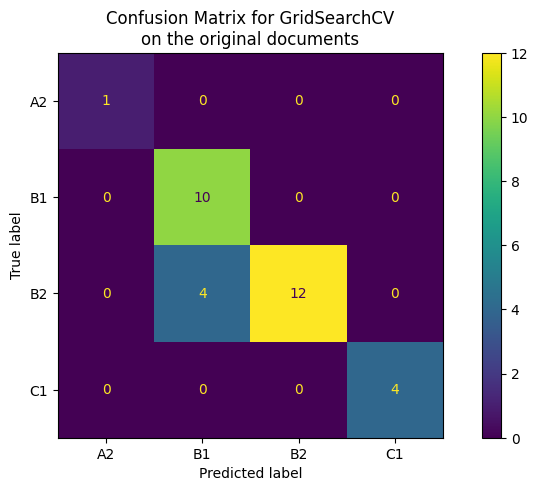

In [137]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test_1, predicted_lr_2, ax=ax)
_ = ax.set_title(
    f"Confusion Matrix for {grid_search_lr_2.__class__.__name__}\non the original documents"
)

In [145]:
# сохранение  лучшей модели
best_model_lr_2 = grid_search_lr_2.best_estimator_
with open('C:/Users/Olga/Documents/Masterskay_2/model_lr_2.pkl', "wb") as dataset:
    pickle.dump(best_model_lr_2, dataset)

Как видим, модель показала достойный результат. Используем ее в дальнейшем при разработке пользовательского приложения. 

## Выводы 

Основные выводы по проекту:
1. Собран датасет на основании предоставленных данных о фильмах и уровне сложности языка. Чтение субтитров произведено с использованием библиотеки pysrt. Обработка и токенизирование текста произведено с использованием библиотеки SpaCy, для векторизации применен TfidfVectorizer в составе pipeline c использованием различных моделей машинного обучения.
2. Наилучший результат показала модель LogicsticRegression, второй результат у модели GradientBoostingClassifier. Наихудшие результаты показали модели LGBMClassifier и XGBClassifier. Из-за ее очень долгой работы, результаты подбора параметров изъяты из итогового кода. В целом модели обучаются достаточно долго, что затрудняет подбор гиперпараметров, в т.ч. с использованием Optuna и RandomizedSearchCV.
3. Произведен, эксперимент с использованием юниграмов и биграмов на двух наилучших моделях. Использование биграмов ухудшает результат в нашем случае, юниграмы дают лучшее качество моделей.
4. Произведен эксперимент по расширению датасета. Так как в основном ошибки выявляются на стадии определения уровней В1 и В2, в модель дополнительно добавлены субтитры фильмов имеющих рейтинг В2 и несколько фильмов с уровнем сложности языка С1. Подобраны данные о фильмах, опираясь на данные об уровне сложности фильмов в сети, и сравнении уровня сложности с уже размеченными в датасете фильмами, опираясь на имеющиеся знания английского языка. Не смотря на снижение качества моделей, что можно в определенной степени объяснить расширением датасета практически на 20%. Таким образом, возьмем за основу модель логистической регрессии, обученной на расширенном датасете. Результаты работы модели на обучающей выборке:
 - Значение f1: 0.7000801823077553
 - Значение f1: 0.7000801823077553
 - Значение accuracy: 0.7546249932333676
 - Значение precision: 0.7598912651151234
 - Значение recall: 0.6992753623188407
 - Значение auc-roc: 0.819659074918496
 - Лучшие параметры модели: {'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'sag'}
5. Тестирование лучшей модели показало хороший результат:

                    precision    recall  f1-score   support

              A2       1.00      1.00      1.00         1
              B1       0.71      1.00      0.83        10
              B2       1.00      0.75      0.86        16
              C1       1.00      1.00      1.00         4
 
       
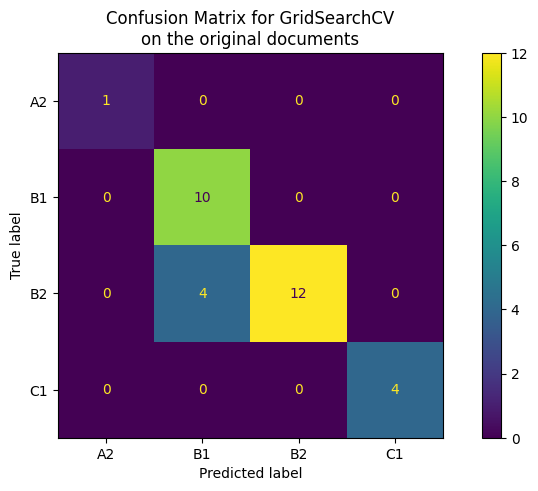









Данная модель будет использована при создании пользовательского приложения.